#Parcial 2

- Villalon Pineda Enrique
- Mendoza Saenz de Buruaga imanol

Mirzakhani

## Ejercicio 1

a) Carga de datos

In [ ]:
import pandas as pd

df = pd.read_csv('/content/segmentation data.csv',index_col=0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


b) Preprocesamiento

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


mis datos ya estan en formato numerico, no hay que mapear a nada

In [ ]:
#Normalizamos
from sklearn.preprocessing import normalize
data_scaled = normalize(df.iloc[:,:7])
data_scaled = pd.DataFrame(data_scaled, columns = df.iloc[:,:7].columns) # lo pasamos a DF
data_scaled.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.000000,0.000000,0.000537,0.000016,1.0,0.000008,0.000016
1,0.000007,0.000007,0.000146,0.000007,1.0,0.000007,0.000013
2,0.000000,0.000000,0.000549,0.000011,1.0,0.000000,0.000000
3,0.000000,0.000000,0.000262,0.000006,1.0,0.000006,0.000006
4,0.000000,0.000000,0.000356,0.000007,1.0,0.000007,0.000007
5,0.000000,0.000000,0.000242,0.000007,1.0,0.000000,0.000000
6,0.000000,0.000000,0.000339,0.000006,1.0,0.000006,0.000006
7,0.000000,0.000000,0.000181,0.000005,1.0,0.000010,0.000005
8,0.000000,0.000007,0.000402,0.000013,1.0,0.000000,0.000000
9,0.000000,0.000006,0.000160,0.000006,1.0,0.000011,0.000000


c)Numero de grupos

Método 1:

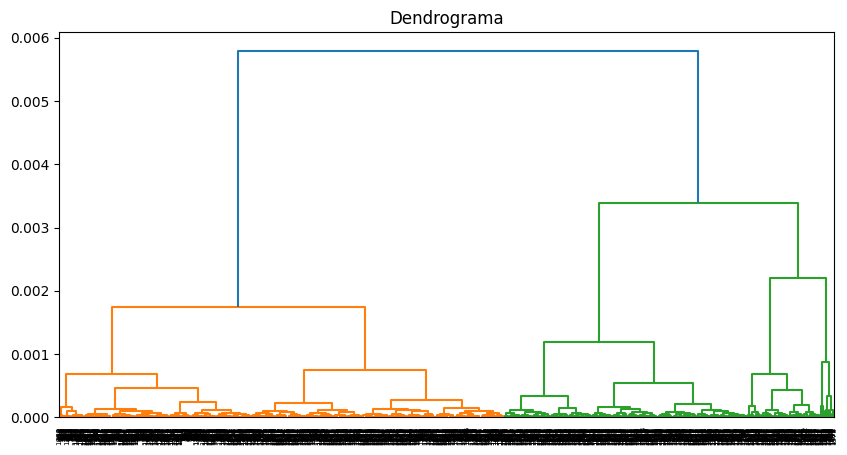

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10, 5))
plt.title('Dendrograma')
dend = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))

Método 2:

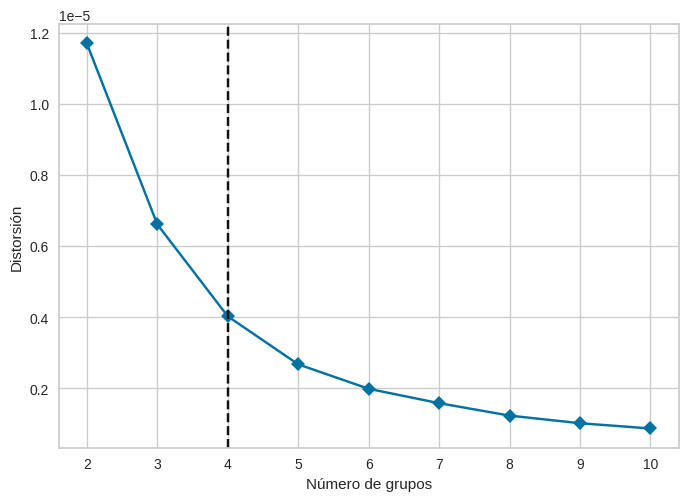

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

visualizer = KElbowVisualizer(KMeans(), timings=False)
visualizer.fit(data_scaled)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

Tomaremos 4 grupos

d) Modelos de agrupamiendo

- K-medias

In [ ]:
# K medias con 4 grupos
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)

# Ajuste con los datos de entrada
kmeans = kmeans.fit(data_scaled)
y_kmeans = kmeans.predict(data_scaled)

# Valores de los centroides
C = kmeans.cluster_centers_
C

array([[ 4.12721397e-06,  4.83409235e-06,  2.17897090e-04,
         6.47003153e-06,  9.99999975e-01,  7.98304485e-06,
         7.01296775e-06],
       [ 4.81538283e-06,  3.67533214e-06,  4.61543542e-04,
         1.29810503e-05,  9.99999892e-01,  2.85446595e-06,
         2.90899346e-06],
       [ 4.13092717e-06,  4.48901312e-06,  3.25017484e-04,
         8.99415866e-06,  9.99999946e-01,  6.04984458e-06,
         5.53343161e-06],
       [ 1.16046444e-05,  1.06532234e-05,  7.68298570e-04,
         2.53368169e-05,  9.99999696e-01, -1.69406589e-21,
         1.31694350e-06]])

- Aglomerativo

In [32]:
# Aglomerativo
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_agl = cluster.fit_predict(data_scaled)
print(y_agl)

[3 0 3 ... 2 0 2]


- Mezlas gaussianas

In [45]:
# Mezclas Gaussianas
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data_scaled)
y_gmm = gmm.predict(data_scaled)
print(y_gmm)

[2 2 2 ... 2 2 2]


e) metrica

In [38]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(data_scaled, y_kmeans)
print(f"Silhouette Score para K-means: {silhouette_kmeans}")

silhouette_agglomerative = silhouette_score(data_scaled, y_agl)
print(f"Silhouette Score Aglomerativo: {silhouette_agglomerative}")



Silhouette Score para K-means: 0.5168729216542042
Silhouette Score para Clustering Aglomerativo: 0.5368070263337263


In [46]:
# Mezclas Gaussianas
import numpy as np
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data_scaled)
y_gmm = gmm.predict(data_scaled)

print(y_gmm)

n_clusters_gmm = len(np.unique(y_gmm))
print(f"Número de clusters en GMM: {n_clusters_gmm}")


[1 1 1 ... 1 1 1]
Número de clusters en GMM: 1


solo nos está arrojando un cluster, no se puede calcular la métrica

## ejercicio 2

**Solución**  
Supongamos que $0 < \alpha < 1$ y sea $r= 1 - \alpha$, sustituyendo el valor de $α$ podemos concluir que $0 < r < 1$.  
Por lo que se puede aplicar la fórmula de convergencia para series geométricas ya que $|r| < 1$. Entoncess:
$$
\begin{align*}
\sum _{i=1} ^{\infty} \alpha (1- \alpha)^{i-1} &= \sum _{i=1} ^{\infty} \alpha (r)^{i-1} \\
&=\sum _{i=0} ^{\infty} \alpha (r)^{i} \\
&= (\frac{\alpha}{1-r}) \\
&= (\frac{\alpha}{1-(1-\alpha)}) \\
&=  \frac{\alpha}{1-1+\alpha} \\
&= \frac{\alpha}{\alpha} \\
&= 1 \\
\therefore \sum _{i=1} ^{\infty} \alpha (1- \alpha)^{i-1} &= 1
\end{align*}
$$

##Ejercicio 4

a) Carga de datos y preprocesamiento

In [54]:
import pandas as pd

df = pd.read_csv('/content/user_behavior_dataset.csv',index_col=0)
df.head(5)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [55]:
import numpy as np
# Convertimos las clasificaciones a numeros
df_features = pd.DataFrame()
for columna in df.columns :
    datos_c = df[columna]
    if(datos_c.dtype != np.int64):
        unique_values = datos_c.unique()
        mapping = {valor:indice for indice,valor in enumerate(unique_values)}
        # Agregar al nuevo data frame los datos convertidos a ints
        df_features[columna] = datos_c.map(mapping)
    else:
        df_features[columna] = datos_c
df_features.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,0,0,393,0,1872,67,1122,40,0,4
2,1,0,268,1,1331,42,944,47,1,3
3,2,0,154,2,761,32,322,42,0,2
4,0,0,239,3,1676,56,871,20,0,3
5,3,1,187,4,1367,58,988,31,1,3


b) Dividir en entrenamiento y prueba:


In [61]:
from sklearn.preprocessing import MinMaxScaler

# Separar características y objetivo
X = df_features.drop(columns=["Operating System"])
y = df_features["Operating System"]

min_max = MinMaxScaler()
X = min_max.fit_transform(X)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c) Aplicación de k-vecinos

In [67]:
# Aplicamos el modelo k-vecinos con k=7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

nbrs = KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree')
nbrs.fit(X_train,y_train)

y_hat = nbrs.predict(X_test)

print('Accuracy :', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='weighted'))
print('Recall   :', recall_score(y_test, y_hat, average='weighted'))
print('F1 Score :', f1_score(y_test, y_hat, average='weighted'))

Accuracy : 0.7642857142857142
Precision: 0.7388955582232892
Recall   : 0.7642857142857142
F1 Score : 0.7481193350702727


In [68]:
# Aplicamos el modelo k-vecinos con k=3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

nbrs = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
nbrs.fit(X_train,y_train)

y_hat = nbrs.predict(X_test)

print('Accuracy :', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='weighted'))
print('Recall   :', recall_score(y_test, y_hat, average='weighted'))
print('F1 Score :', f1_score(y_test, y_hat, average='weighted'))

Accuracy : 0.8571428571428571
Precision: 0.8571428571428571
Recall   : 0.8571428571428571
F1 Score : 0.8571428571428571


In [69]:
# Aplicamos el modelo k-vecinos con k=4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

nbrs = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
nbrs.fit(X_train,y_train)

y_hat = nbrs.predict(X_test)


print('Accuracy :', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='weighted'))
print('Recall   :', recall_score(y_test, y_hat, average='weighted'))
print('F1 Score :', f1_score(y_test, y_hat, average='weighted'))

Accuracy : 0.8642857142857143
Precision: 0.859978137596502
Recall   : 0.8642857142857143
F1 Score : 0.8493027381713347


dAjusta XGBoost

In [70]:
# Aplicamos el clasificador XGBoost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Entrenamiento
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predicción
y_hat = xgb.predict(X_test)

# Calcular y mostrar las métricas
print('Accuracy :', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='weighted'))
print('Recall   :', recall_score(y_test, y_hat, average='weighted'))
print('F1 Score :', f1_score(y_test, y_hat, average='weighted'))


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


e) Marca y lo mismo

In [84]:

df['Marca'] = df['Device Model'].str.split().str[0]
print(df.head())



           Device Model Operating System  App Usage Time (min/day)  \
User ID                                                              
1        Google Pixel 5          Android                       393   
2             OnePlus 9          Android                       268   
3          Xiaomi Mi 11          Android                       154   
4        Google Pixel 5          Android                       239   
5             iPhone 12              iOS                       187   

         Screen On Time (hours/day)  Battery Drain (mAh/day)  \
User ID                                                        
1                               6.4                     1872   
2                               4.7                     1331   
3                               4.0                      761   
4                               4.8                     1676   
5                               4.3                     1367   

         Number of Apps Installed  Data Usage (MB/day)  Age 

In [88]:
import numpy as np
# Convertimos las clasificaciones a numeros
df_features = pd.DataFrame()
for columna in df.columns :
    datos_c = df[columna]
    if(datos_c.dtype != np.int64):
        unique_values = datos_c.unique()
        mapping = {valor:indice for indice,valor in enumerate(unique_values)}
        # Agregar al nuevo data frame los datos convertidos a ints
        df_features[columna] = datos_c.map(mapping)
    else:
        df_features[columna] = datos_c
df_features.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Marca
User ID,,,,,,,,,,,
1,0,0,393,0,1872,67,1122,40,0,4,0
2,1,0,268,1,1331,42,944,47,1,3,1
3,2,0,154,2,761,32,322,42,0,2,2
4,0,0,239,3,1676,56,871,20,0,3,0
5,3,1,187,4,1367,58,988,31,1,3,3


In [91]:
from sklearn.preprocessing import MinMaxScaler

# Separar características y objetivo
X = df_features.loc[:,'Device Model':'User Behavior Class']
y = df_features['Marca'].values

min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Aplicamos el modelo k-vecinos con k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


for k in range(3,10,2):
  nbrs = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
  nbrs.fit(X_train,y_train)

  y_hat = nbrs.predict(X_test)

  print('\n\nvalor de K =',k)
  print('Accuracy :', accuracy_score(y_test, y_hat))
  print('Precision:', precision_score(y_test, y_hat, average='weighted'))
  print('Recall   :', recall_score(y_test, y_hat, average='weighted'))
  print('F1 Score :', f1_score(y_test, y_hat, average='weighted'))



valor de K = 3
Accuracy : 0.8357142857142857
Precision: 0.8474103102779574
Recall   : 0.8357142857142857
F1 Score : 0.8347735559634873


valor de K = 5
Accuracy : 0.8357142857142857
Precision: 0.8474103102779574
Recall   : 0.8357142857142857
F1 Score : 0.8347735559634873


valor de K = 7
Accuracy : 0.8357142857142857
Precision: 0.8474103102779574
Recall   : 0.8357142857142857
F1 Score : 0.8347735559634873


valor de K = 9
Accuracy : 0.8357142857142857
Precision: 0.8474103102779574
Recall   : 0.8357142857142857
F1 Score : 0.8347735559634873


In [94]:
# Aplicamos el clasificador XGBoost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Entrenamiento
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predicción
y_hat = xgb.predict(X_test)

# Calcular y mostrar las métricas
print('Accuracy :', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='weighted'))
print('Recall   :', recall_score(y_test, y_hat, average='weighted'))
print('F1 Score :', f1_score(y_test, y_hat, average='weighted'))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


# Ejercicio 7

a) Elige dos columnas para serie de tiempo y b) apica el procesamiento encesario

In [108]:
import pandas as pd

df = pd.read_csv('/content/Rainfall_data.csv')
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


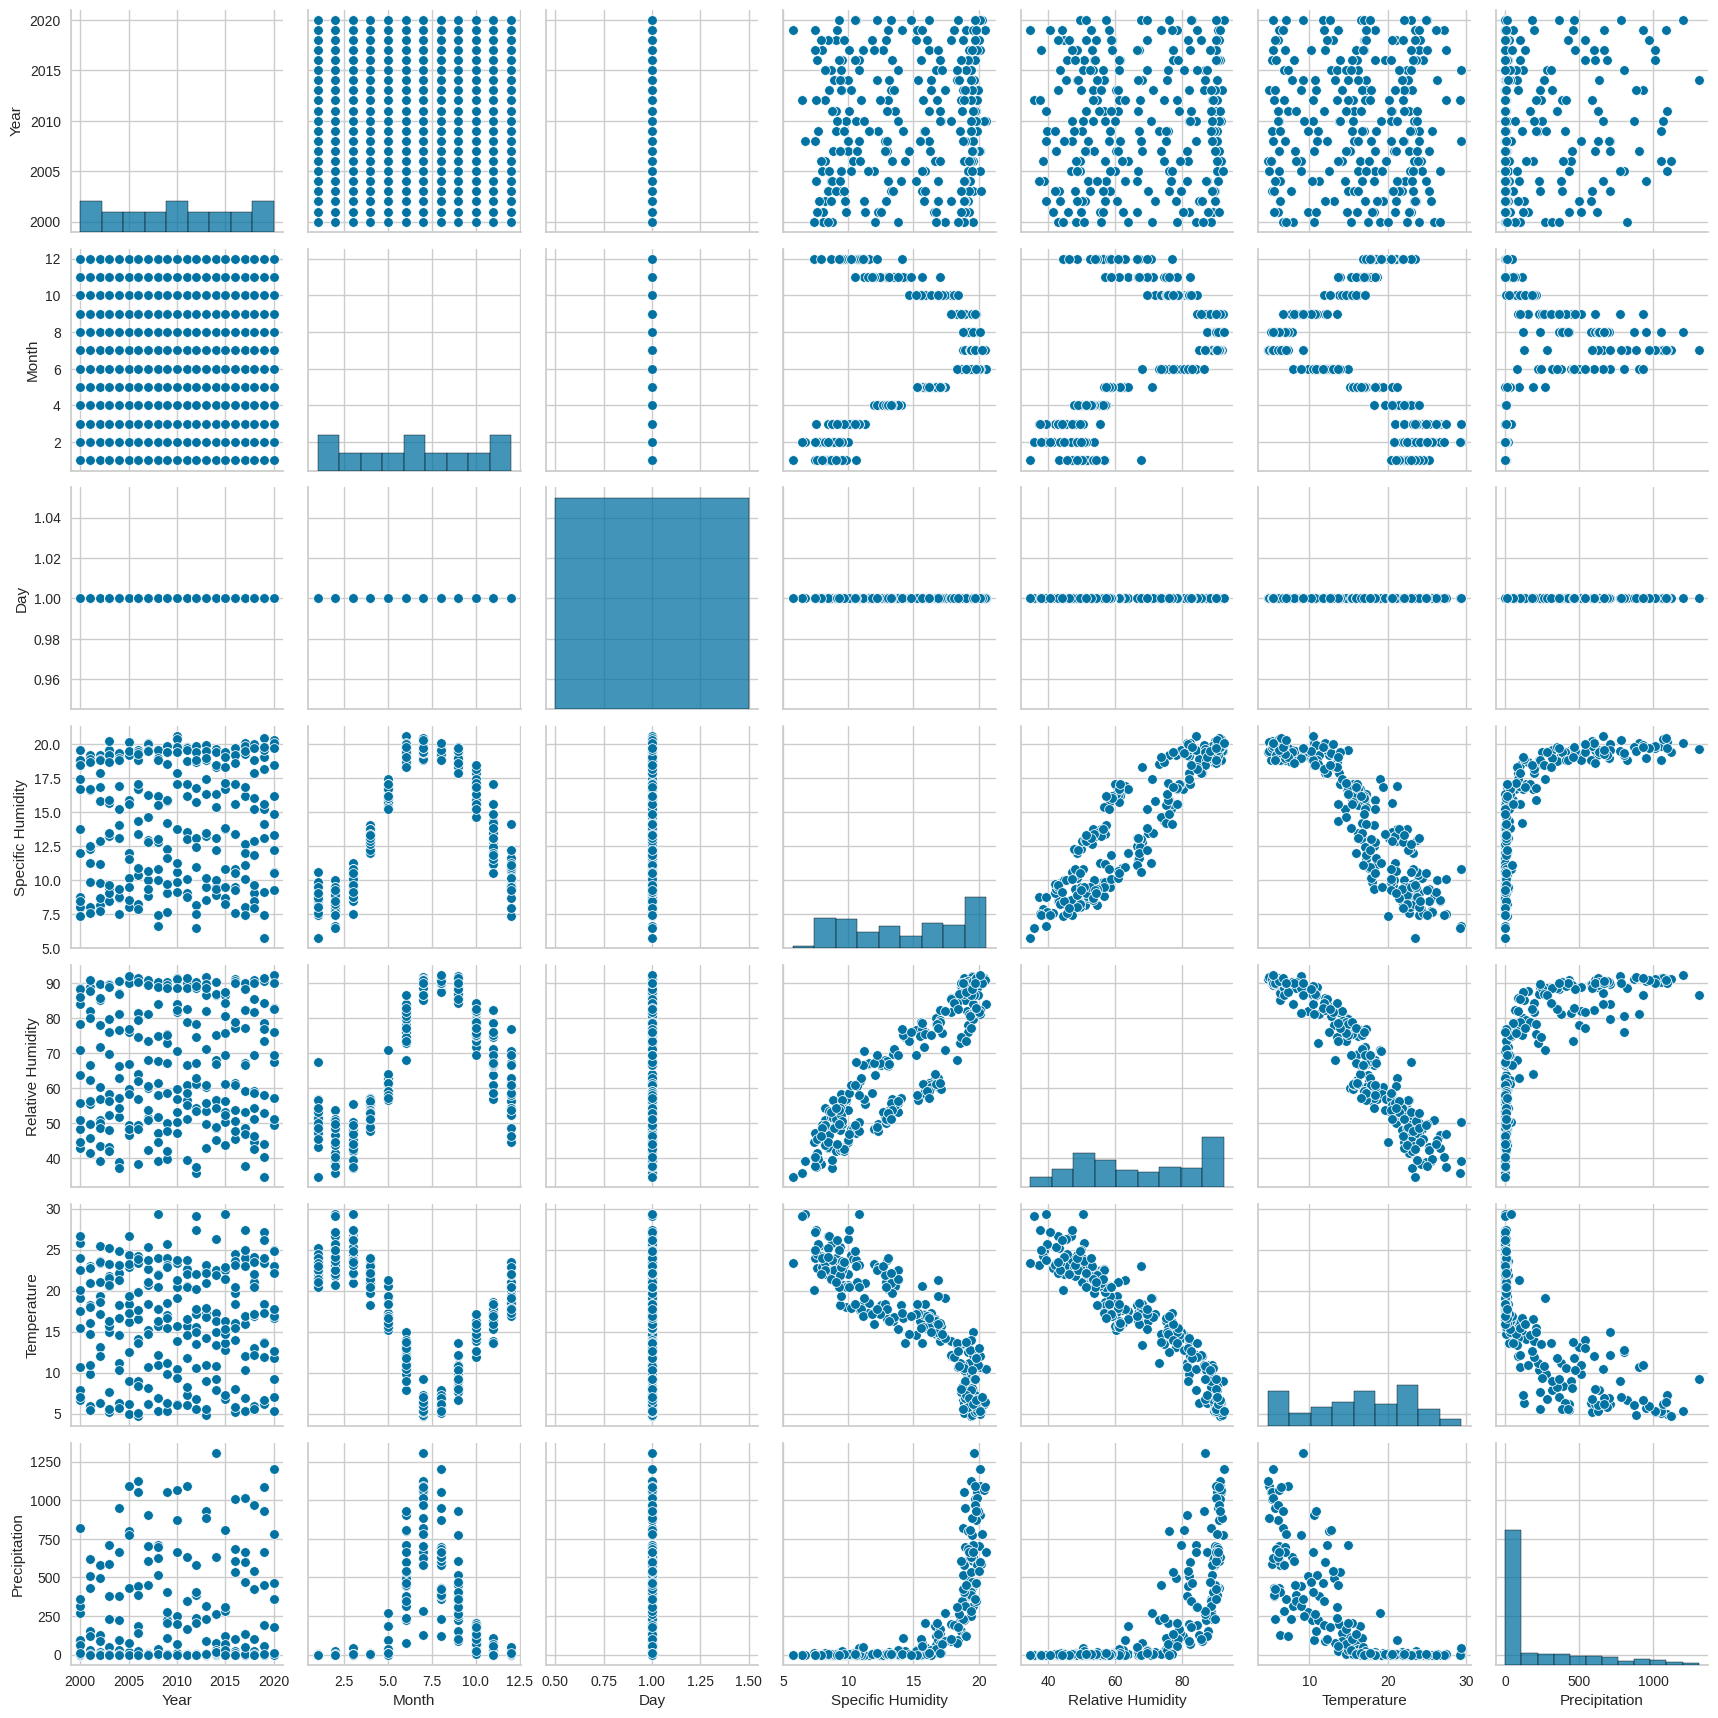

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

In [110]:
cont_corr=df.corr(method='spearman')
cont_corr

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
Year,1.000000,0.000000,NaN,0.061073,0.042525,-0.009455,0.089145
Month,0.000000,1.000000,NaN,0.390588,0.568185,-0.538958,0.340029
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific Humidity,0.061073,0.390588,NaN,1.000000,0.908408,-0.912826,0.892948
Relative Humidity,0.042525,0.568185,NaN,0.908408,1.000000,-0.959886,0.841832
Temperature,-0.009455,-0.538958,NaN,-0.912826,-0.959886,1.000000,-0.851580
Precipitation,0.089145,0.340029,NaN,0.892948,0.841832,-0.851580,1.000000


<Axes: >

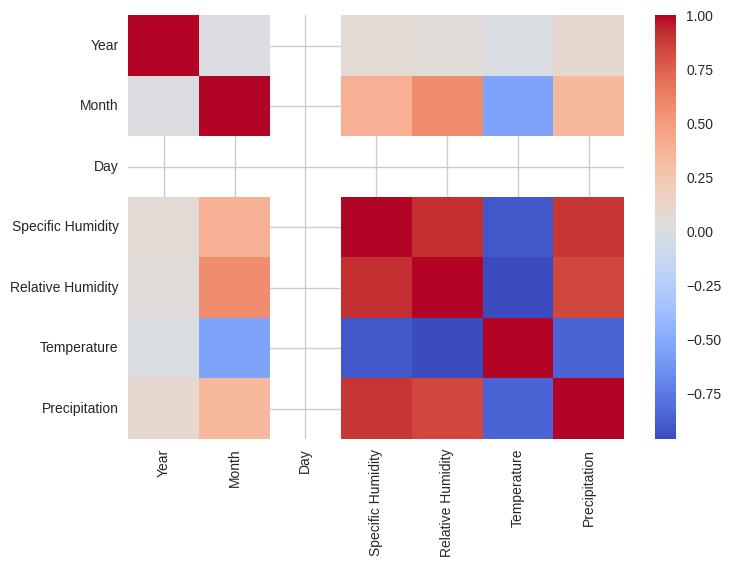

In [111]:
sns.heatmap(cont_corr,cmap='coolwarm',xticklabels=cont_corr.columns,yticklabels=cont_corr.columns)

In [121]:
rel=pd.read_csv('/content/Rainfall_data.csv',index_col=['Month'],parse_dates=['Month'])

<ipython-input-121-b8c6360dfd00>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rel=pd.read_csv('/content/Rainfall_data.csv',index_col=['Month'],parse_dates=['Month'])


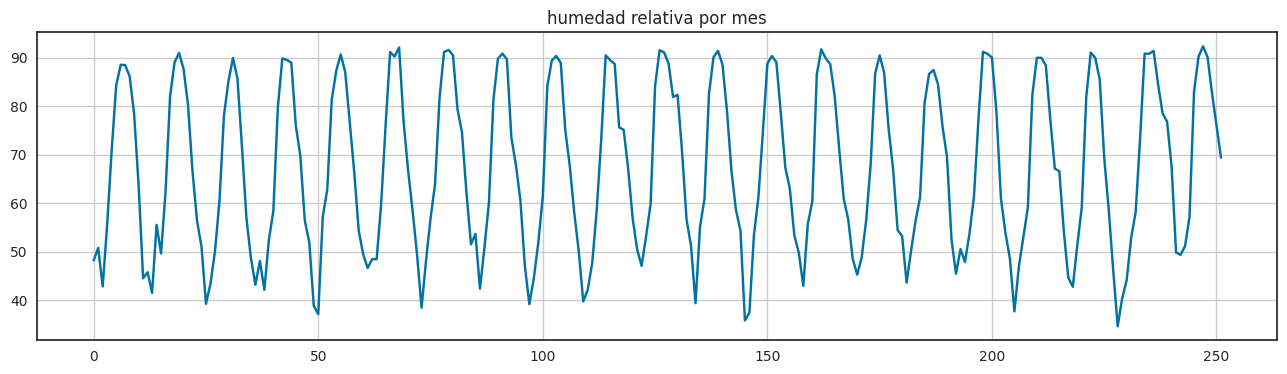

In [171]:
plt.figure(figsize=(16,4))
plt.plot(df['Relative Humidity'])
plt.title('humedad relativa por mes')
plt.grid(True)
plt.show()

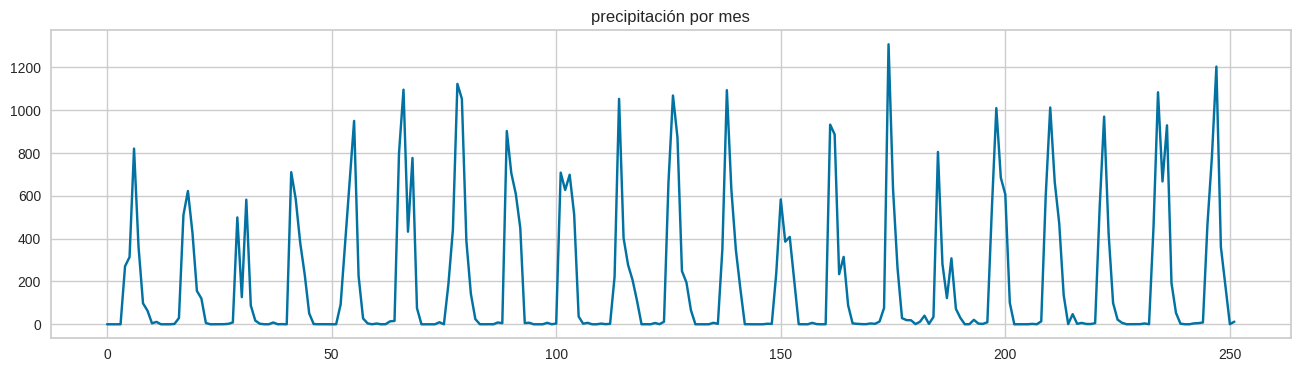

In [125]:
plt.figure(figsize=(16,4))
plt.plot(df['Precipitation'])
plt.title('precipitación por mes')
plt.grid(True)
plt.show()

c) Obten las graficas de autocorrelación

In [128]:
import statsmodels.api as sm
import scipy.stats as scs

<Figure size 1000x600 with 0 Axes>

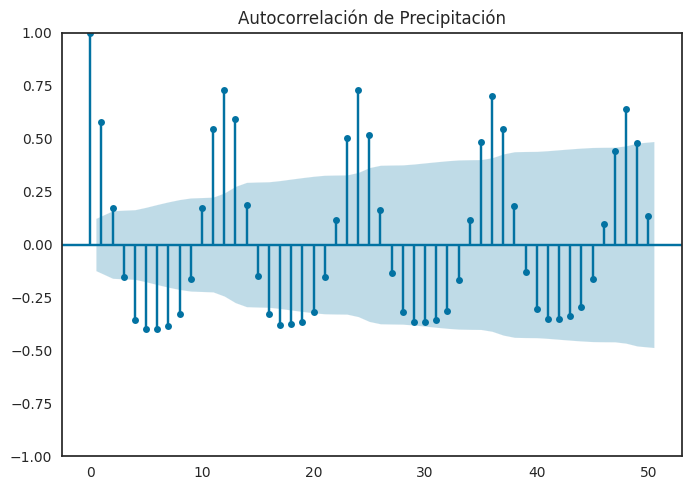

<Figure size 1000x600 with 0 Axes>

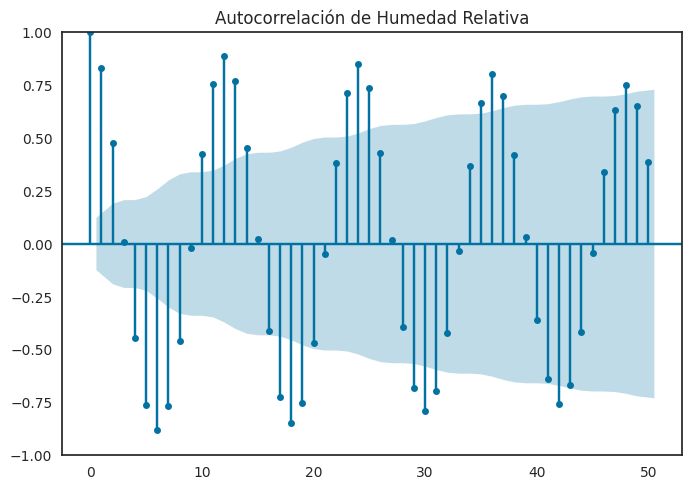

In [160]:
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df['Precipitation'].values, lags=50)
plt.title('Autocorrelación de Precipitación')
plt.show()

plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df['Relative Humidity'].values, lags=50)
plt.title('Autocorrelación de Humedad Relativa')
plt.show()

Los datos se estabilizan, por lo tando si se puede aplicar un analisis de serie de tiempo

In [130]:
# media movil
def moving_average(series, n):

    return np.average(series[-n:])

moving_average(df, 24)

342.14285714285717

d) aplica media movil y un método de suavizado

In [131]:
# Métricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [172]:
import matplotlib.pyplot as plt
def plot_moving_average(series, window, plot_intervals = False, scale = 1.96, plot_anomalies = False):

    rolling_mean = series.rolling(window = window).mean()   # version de pandas para la media movil
    plt.figure(figsize=(12,5))
    plt.title('Media móvil \ntamaño de la ventana = {}'.format(window))
    plt.plot(rolling_mean, color='darkseagreen', label = 'Tendencia por media móvil')
    #
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        low_ = rolling_mean - (mae + scale * deviation)
        upp_ = rolling_mean + (mae + scale * deviation)
        plt.plot(upp_, 'blue', linestyle='--', label='Límites inferior/superior')
        plt.plot(low_, 'blue', linestyle='--' )
    #
    if plot_anomalies:
        anom = pd.DataFrame(index=series.index, columns=series.columns)
        anom[series<low_] = series[series<low_]
        anom[series>upp_] = series[series>upp_]
        plt.plot(anom, 'ro', markersize=7)

    plt.plot(series[window:], color='red', label='Valores reales')
    plt.legend(loc='best')
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


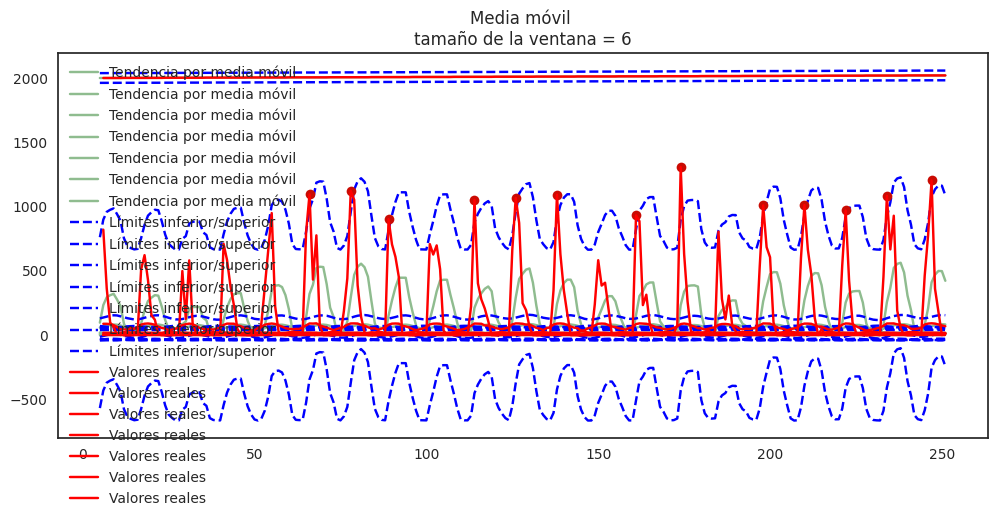

In [173]:
plot_moving_average(df, 6, plot_intervals=True, plot_anomalies=True)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


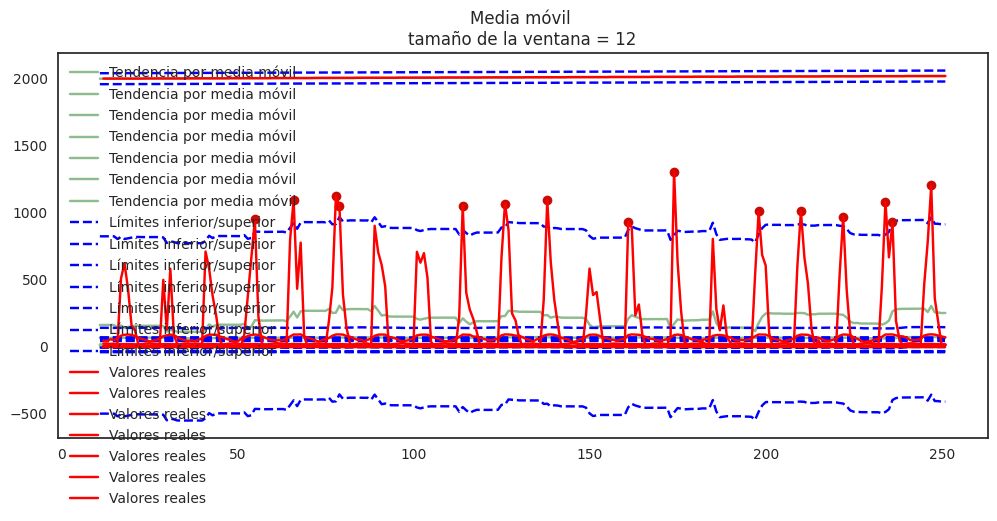

In [174]:
plot_moving_average(df, 12, plot_intervals=True, plot_anomalies=True)

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_exponential_smoothing(series, alphas):

  sns.set_style('white')
  plt.figure(figsize=(12,5))

  for alpha in alphas:
    smoothed_series = series.ewm(alpha=alpha, adjust=False).mean()
    plt.plot(smoothed_series, label=f'alpha: {alpha}')


  plt.plot(series, label='Serie original')
  plt.legend(loc='best')
  plt.title('Media exponencial suavizada')
  plt.grid(True)
  plt.show()

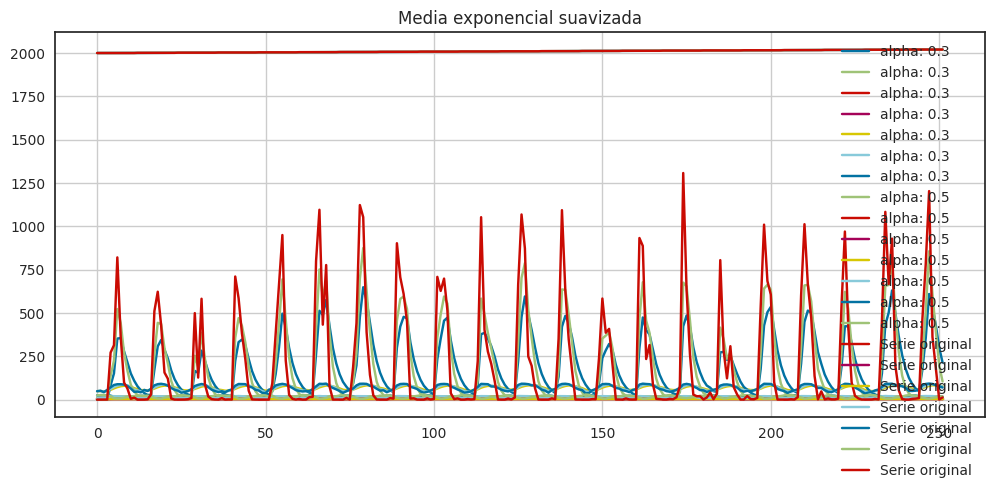

In [176]:
plot_exponential_smoothing(df, [ 0.3, 0.5])

In [178]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_hw_smoothing(series, n=20):
    hw = ExponentialSmoothing((series), seasonal_periods=12).fit()

    # prediccion
    train, test = series[:-n], series[len(series)-n:]
    hw_pred = hw.predict(start=test.index[0], end=test.index[-1])
    plt.figure(figsize=(15,5))
    plt.plot(train.index, train, label='Entrenamiento')
    plt.plot(test.index, test, label='Prueba')
    plt.plot(hw_pred.index, hw_pred, label='Holt-Winters')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

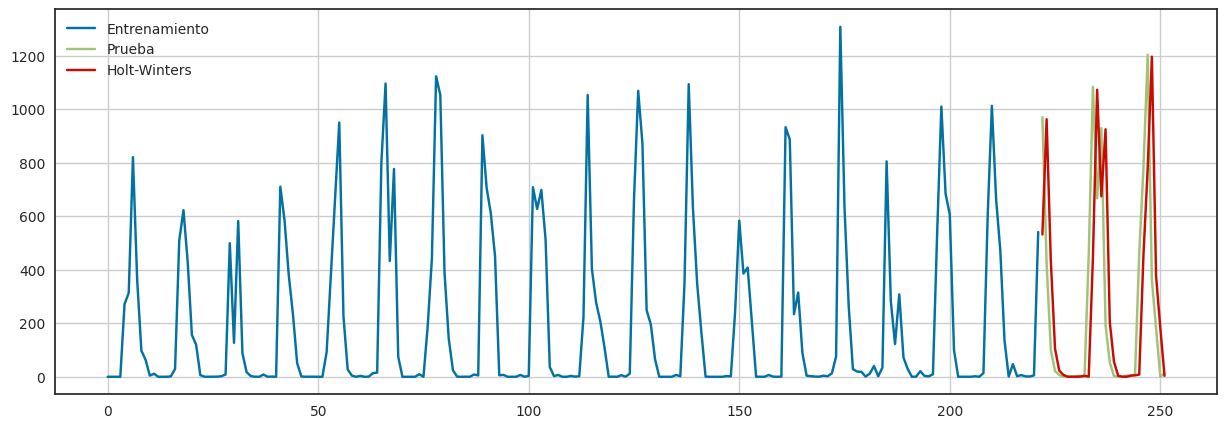

In [179]:
plot_hw_smoothing(df['Precipitation'], 30)

e) Regresión lineal con retraso

In [180]:
import pandas as pd
import numpy as np

def create_lags(data, lag=1):
    df_lagged = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = df_lagged[0].shift(i)
    return df_lagged.dropna()

data = df['Precipitation'].values
lagged_data = create_lags(data, lag=6)
print(lagged_data)


           0    lag_1    lag_2    lag_3    lag_4   lag_5   lag_6
6     820.45   313.67   271.14     0.02     0.01    0.11    0.00
7     362.38   820.45   313.67   271.14     0.02    0.01    0.11
8      97.85   362.38   820.45   313.67   271.14    0.02    0.01
9      63.41    97.85   362.38   820.45   313.67  271.14    0.02
10      4.37    63.41    97.85   362.38   820.45  313.67  271.14
..       ...      ...      ...      ...      ...     ...     ...
247  1203.09   781.13   462.71     8.29     5.46    4.09    0.19
248   361.30  1203.09   781.13   462.71     8.29    5.46    4.09
249   180.18   361.30  1203.09   781.13   462.71    8.29    5.46
250     0.49   180.18   361.30  1203.09   781.13  462.71    8.29
251    12.23     0.49   180.18   361.30  1203.09  781.13  462.71

[246 rows x 7 columns]


In [181]:

#Preparo mis datos para la regresión
X = lagged_data.drop(columns=[0])
y = lagged_data[0]


In [182]:
def timeseries_train_test_split(X,y,test_size):
  test_index=int(len(X)*(1-test_size))
  test_index = int(len(X)*(1-test_size))
  X_train=X.iloc[:test_index]
  y_train=y.iloc[:test_index]
  X_test=X.iloc[test_index:]
  y_test=y.iloc[test_index:]
  return X_train,X_test,y_train,y_test

In [183]:

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

# Ajustar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicción
y_pred = lr.predict(X_test)


In [184]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
tscv=TimeSeriesSplit(n_splits=5)

def plot_lr_ts(model, X_train, X_test, y_train, y_test, scale=1.96, plot_intervals=False, plot_anomalies=False):
    pred = model.predict(X_test)
    plt.figure(figsize=(15,7))
    plt.plot(pred, 'g', label='Predicción', linewidth=2)
    plt.plot(y_test.values, label='Real', linewidth=2)
    # p_i
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
        mae = cv.mean() * (-1)
        dev = cv.std()
        low = pred - (mae + scale*dev)
        upp = pred + (mae + scale*dev)
        plt.plot(low, 'r--', label='límite inferior/superior', alpha=0.5)
        plt.plot(upp, 'r--', alpha=0.5)

    # p_a (tarea)

    error = mean_absolute_percentage_error(pred, y_test)
    plt.title('Error absoluto promedio = {0:.3f}%'.format(error))
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def plot_coefs(model):
    coefs = pd.DataFrame(model.coef_, X_train.columns, columns=['coef'])
    coefs['abs'] = coefs['coef'].apply(np.abs)
    coefs = coefs.sort_values(by='abs', ascending=False).drop(['abs'], axis=1)
    plt.figure(figsize=(8, 3))
    coefs['coef'].plot(kind='bar')
    plt.grid(True, axis='y')
    plt.show()

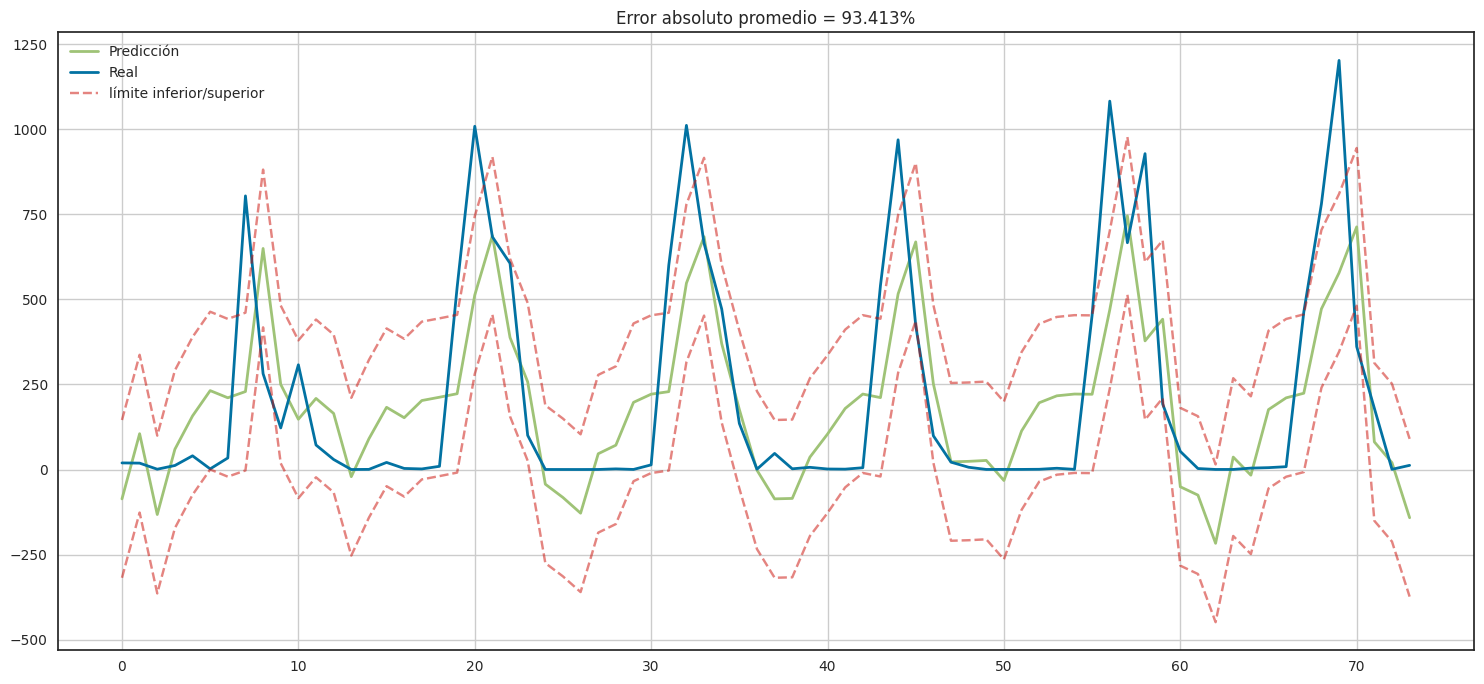

In [186]:
plot_lr_ts(lr, X_train, X_test, y_train, y_test, plot_intervals=True)